가장 설명력(R^2), 상관계수(R)가 높은 가설 5개 선정

-> 해당 가설 5개로 top 5 선정

-> 취합하여 가장 정류장이 필요한 자치구 top 5 선정

In [1]:
%cd 'bus_df_file'

/Users/unhi/Desktop/AI+X/두번째과제/데이터전처리/bus_df_file


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from matplotlib import rc
rc('font', family='AppleGothic')

In [5]:
import pandas as pd

In [6]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

* **상관관계가 있는 가설**

    - 출발자치구와 도착자치구가 다를 때와 같을 때의 평균 이동시간에 차이가 있다.

  - 버스정류장수와 유입인구수에는 상관관계가 있다.
  - 버스정류장수와 유출인구수에는 상관관계가 있다.

  - 노선수와 유입인구수는 상관관계가 있다.
  - 요식업 사업체 수와 승하차총승객수는 상관관계가 있다.

  - 야간상주지(집)으로 가는 유동인구와 등록인구는 상관관계가 있다.
  - 주간상주지(근무지)로 가는 유동인구와 총 종사자수는 상관관계가 있다.

  - 이동유형 HW의 이동인구와 HE의 이동인구에는 차이가 있다. 
(집에서 근무지로 이동하는 인구수와 집에서 근무지 외 다른 곳으로 이동하는 인구수에 차이가 있다.)

  - 구의 인구와 버스정류장개수는 상관관계가 있다.

### **1. 출발자치구와 도착자치구가 다를 때와 같을 때의 평균 이동시간에 차이가 있다.**

In [7]:
# 1. 상관관계 분석 (상관계수, p-value)
# 2. 변수 2개로 회귀모델 세우기
# 3. 상관계수, 설명력 확인

In [8]:
import numpy as np
from scipy.stats import ttest_ind

In [9]:
sm= df_seoul_moving.loc[df_seoul_moving['출발 시군구 코드']==df_seoul_moving['도착 시군구 코드']]
df= df_seoul_moving.loc[df_seoul_moving['출발 시군구 코드']!=df_seoul_moving['도착 시군구 코드']]

In [10]:
sm= sm.reset_index(drop=True)
df= df.reset_index(drop=True)

In [11]:
# 1. 상관관계 분석
ttest_ind(df['평균 이동 시간(분)'], sm['평균 이동 시간(분)'])

Ttest_indResult(statistic=696.373127204961, pvalue=0.0)

In [12]:
# 데이터 길이 맞추기
sm1= sm.loc[:1100000]
df1= df.loc[:1100000]

In [13]:
print(sm.shape, df.shape)
print(sm1.shape, df1.shape)

(1108304, 10) (9547591, 10)
(1100001, 10) (1100001, 10)


In [14]:
ttest_ind(df1['평균 이동 시간(분)'], sm1['평균 이동 시간(분)'])

Ttest_indResult(statistic=535.897683567569, pvalue=0.0)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
lr = LinearRegression()

In [17]:
# 2. 변수 2개로 회귀모델 세우기
y= sm1['평균 이동 시간(분)']
X= df1[['평균 이동 시간(분)']]

X= X.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [18]:
# lr.fit(X_train, y_train)

In [19]:
# print('y= ', lr.coef_[0], "* x + ", lr.intercept_)

In [20]:
import matplotlib.pyplot as plt

In [21]:
# # plt.scatter(X[:100], y[:100])
# plt.plot(X, lr.coef_[0]*X + lr.intercept_, color='red')
# plt.show()

In [22]:
# 3. 상관계수, 설명력 확인

In [23]:
import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(X)).fit()

ModuleNotFoundError: No module named 'statsmodels'

In [24]:
# A. F-statistic
# 도출된 회귀식이 회귀분석 모델 전체에 대해 통계적으로 의미가 있는지 파악

# B. P-Value
# 각 변수가 종속변수에 미치는 영향이 유의한지 파악

# C. 수정된 R제곱
# 회귀직선에 의하여 설명되는 변동이 총변동 중에서 차지하고 있는 상대적인 비율이 얼마인지 나타냄
# 즉, 회귀직선이 종속변수의 몇%를 설명할 수 있는지 확인

In [25]:
results.summary()
# R-squared(설명력):	0.000
# Prob (F-statistic)(p-value):	0.400
# F-statistic:	0.7072

NameError: name 'results' is not defined

### **2.1. 버스정류장수와 유입인구수에는 상관관계가 있다.**

In [26]:
# 1. 상관관계 분석 (상관계수, p-value)
# 2. 변수 2개로 회귀모델 세우기
# 2. 상관계수, 설명력 확인

In [27]:
df= df_seoul_moving.loc[df_seoul_moving['출발 시군구 코드']!=df_seoul_moving['도착 시군구 코드']]

In [28]:
# 1. 상관관계 분석 (상관계수, p-value)

In [29]:
inn= df.groupby('도착 시군구 코드')[['이동인구(합)']].sum()

In [30]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [31]:
innn= pd.DataFrame()
innn= pd.merge(standard, df_seoul_bus_station, how='inner', on='자치구')
innn= pd.merge(innn, inn, how='inner', on='도착 시군구 코드')

In [32]:
from scipy.stats import mannwhitneyu
mannwhitneyu(innn['정류장수'], innn['이동인구(합)'])

MannwhitneyuResult(statistic=0.0, pvalue=1.4156562248495537e-09)

In [33]:
# 2. 변수 2개로 회귀모델 세우기

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [35]:
lr = LinearRegression()

In [36]:
y= innn['정류장수']
X= innn[['이동인구(합)']]

X= X.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [37]:
lr.fit(X_train, y_train)

LinearRegression()

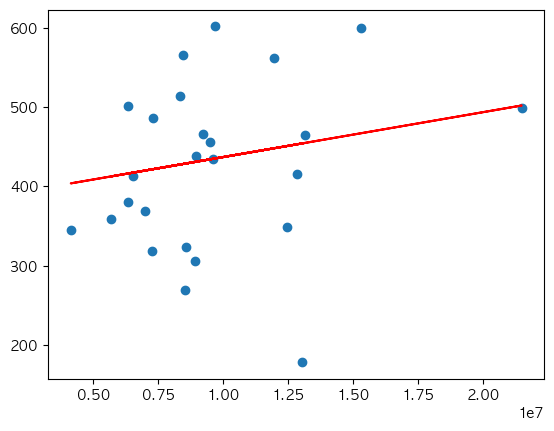

In [38]:
plt.scatter(X, y)
plt.plot(X, lr.coef_[0]*X + lr.intercept_, color='red')
plt.show()

In [39]:
# 3. 상관계수, 설명력 확인

In [40]:
import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(X)).fit()

ModuleNotFoundError: No module named 'statsmodels'

In [41]:
results.summary()
# R-squared(설명력):	0.055
# Prob (F-statistic)(p-value):	0.258
# F-statistic:	1.345

NameError: name 'results' is not defined

### 2.2. 버스정류장수와 유출인구수에는 상관관계가 있다. 

(코드가 안 돌아가서 패스)




In [57]:
# 1. 상관관계 분석 (상관계수, p-value)
# 2. 변수 2개로 회귀모델 세우기
# 2. 상관계수, 설명력 확인

In [58]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')

In [59]:
df= df_seoul_moving.loc[df_seoul_moving['출발 시군구 코드']!=df_seoul_moving['도착 시군구 코드']]

In [60]:
# 1. 상관관계 분석 (상관계수, p-value)

In [61]:
outt= df.groupby('출발 시군구 코드')[['이동인구(합)']].sum()

In [62]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [63]:
# outtt= pd.DataFrame()
# outtt= pd.merge(standard, df_seoul_bus_station, how='inner', on='자치구')

In [64]:
# from scipy.stats import mannwhitneyu
# mannwhitneyu(outt['정류장수'], outt['이동인구(합)'])

## **3. 노선수와 유입인구수는 상관관계가 있다.** (1)

In [65]:
# 1. 상관관계 분석 (상관계수, p-value)
# 2. 변수 2개로 회귀모델 세우기
# 2. 상관계수, 설명력 확인

In [66]:
df= df_seoul_moving.loc[df_seoul_moving['출발 시군구 코드']!=df_seoul_moving['도착 시군구 코드']]

In [67]:
from scipy.stats import mannwhitneyu
mannwhitneyu(innn['노선수'], innn['이동인구(합)'])

MannwhitneyuResult(statistic=0.0, pvalue=1.4131023700672182e-09)

In [68]:
# 2. 변수 2개로 회귀모델 세우기

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [70]:
lr = LinearRegression()

In [71]:
y= innn['노선수']
X= innn[['이동인구(합)']]

X= X.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [72]:
lr.fit(X_train, y_train)

LinearRegression()

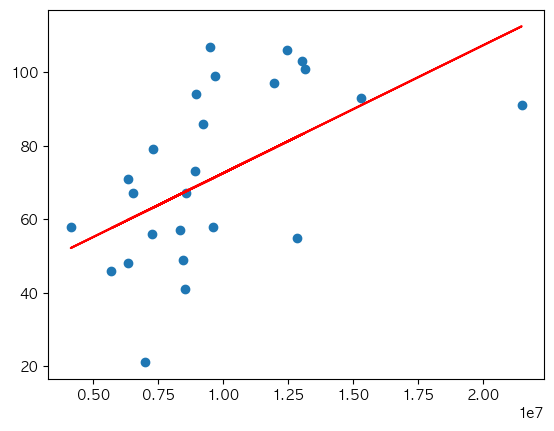

In [73]:
plt.scatter(X, y)
plt.plot(X, lr.coef_[0]*X + lr.intercept_, color='red')
plt.show()

In [74]:
# 3. 상관계수, 설명력 확인

In [75]:
import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(X)).fit()

ModuleNotFoundError: No module named 'statsmodels'

In [76]:
results.summary()
# R-squared(설명력):	0.300
# Prob (F-statistic)(p-value):	0.00461
# F-statistic:	9.850

NameError: name 'results' is not defined

#### 버스정류장이 가장 필요한 자치구 순위

In [77]:
# innn

In [90]:
import operator
import streamlit as st

score= {}

for i in range(len(innn)):
    score[innn['자치구'][i]] = innn['노선수'][i]/innn['이동인구(합)'][i]

score = sorted(score.items(), key=operator.itemgetter(1))
df = pd.DataFrame(score, columns = ['자치구', '유입인구수 대비 노선수'])
df 

,자치구,유입인구수 대비 노선수
0,강동구,0.000003
1,강남구,0.000004
2,송파구,0.000004
3,광진구,0.000005
4,강서구,0.000006
5,성동구,0.000006
6,서초구,0.000006
7,노원구,0.000007
8,중랑구,0.000008
9,영등포구,0.000008


### TOP 5  
1. 강동구
2. 강남구
3. 송파구
4. 광진구
5. 강서구

### **4. 요식업 사업체 수와 승하차총승객수는 상관관계가 있다.**

In [483]:
# 1. 상관관계 분석 (상관계수, p-value)
# 2. 변수 2개로 회귀모델 세우기
# 2. 상관계수, 설명력 확인

In [484]:
# df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
# df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
# df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
# df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [485]:
df_seoul_business.columns

Index(['자치구', '동', '택시운송업(사업체수)', '택시운송업(종사자수)', '한식일반음식점업(사업체수)',
       '한식일반음식점업(종사자수)', '용달화물자동차운송업(사업체수)', '용달화물자동차운송업(종사자수)',
       '부동산중개및대리업(사업체수)', '부동산중개및대리업(종사자수)', '두발미용업(사업체수)', '두발미용업(종사자수)',
       '커피전문점(사업체수)', '커피전문점(종사자수)', '남녀용겉옷및셔츠도매업(사업체수)', '남녀용겉옷및셔츠도매업(종사자수)',
       '기타주점업(사업체수)', '기타주점업(종사자수)', '일반교과학원(사업체수)', '일반교과학원(종사자수)',
       '한식육류요리전문점(사업체수)', '한식육류요리전문점(종사자수)'],
      dtype='object')

In [486]:
df_seoul_business['한식일반음식점업(사업체수)']= df_seoul_business['한식일반음식점업(사업체수)'].str.replace(',', '')
df_seoul_business['한식일반음식점업(사업체수)']= df_seoul_business['한식일반음식점업(사업체수)'].str.replace('-', '0')
df_seoul_business['한식일반음식점업(사업체수)']= df_seoul_business['한식일반음식점업(사업체수)'].astype('int64')

In [487]:
df_seoul_business['커피전문점(사업체수)']= df_seoul_business['커피전문점(사업체수)'].str.replace(',', '')
df_seoul_business['커피전문점(사업체수)']= df_seoul_business['커피전문점(사업체수)'].str.replace('-', '0')
df_seoul_business['커피전문점(사업체수)']= df_seoul_business['커피전문점(사업체수)'].astype('int64')

In [488]:
df_seoul_business['한식육류요리전문점(사업체수)']= df_seoul_business['한식육류요리전문점(사업체수)'].str.replace(',', '')
df_seoul_business['한식육류요리전문점(사업체수)']= df_seoul_business['한식육류요리전문점(사업체수)'].str.replace('-', '0')
df_seoul_business['한식육류요리전문점(사업체수)']= df_seoul_business['한식육류요리전문점(사업체수)'].astype('int64')

In [489]:
df_seoul_business['기타주점업(사업체수)']= df_seoul_business['기타주점업(사업체수)'].str.replace(',', '')
df_seoul_business['기타주점업(사업체수)']= df_seoul_business['기타주점업(사업체수)'].str.replace('-', '0')
df_seoul_business['기타주점업(사업체수)']= df_seoul_business['기타주점업(사업체수)'].astype('int64')

In [490]:
df_seoul_business_= df_seoul_business.groupby(['자치구']).sum()

In [491]:
df_seoul_business_.head()

,한식일반음식점업(사업체수),커피전문점(사업체수),기타주점업(사업체수),한식육류요리전문점(사업체수)
자치구,,,,
강남구,4830,3248,1426,1654
강동구,2202,1092,1178,856
강북구,1930,716,1160,724
강서구,2650,1380,1588,1162
관악구,2452,1162,1316,844


In [492]:
df_restaurant_business= pd.DataFrame()
df_restaurant_business['한식일반음식점업(사업체수)']= df_seoul_business_['한식일반음식점업(사업체수)']
df_restaurant_business['커피전문점(사업체수)']= df_seoul_business_['커피전문점(사업체수)']
df_restaurant_business['한식육류요리전문점(사업체수)']= df_seoul_business_['한식육류요리전문점(사업체수)']
df_restaurant_business['기타주점업(사업체수)']= df_seoul_business_['기타주점업(사업체수)']

In [493]:
df_seoul_business_= df_seoul_business_.reset_index(drop=False)

In [494]:
df_restaurant_business['자치구']= df_seoul_business_['자치구']

In [495]:
df_restaurant_business['총 요식업 사업체수']= df_restaurant_business['한식일반음식점업(사업체수)'] + \
df_restaurant_business['커피전문점(사업체수)'] + \
df_restaurant_business['한식육류요리전문점(사업체수)'] + \
df_restaurant_business['기타주점업(사업체수)']

In [496]:
df_restaurant_business.shape

(26, 6)

In [497]:
df_restaurant_business= df_restaurant_business.drop(index= df_restaurant_business[df_restaurant_business['자치구']=='합계'].index)

In [498]:
df_seoul_bus_passenger= pd.DataFrame()
df_seoul_bus_passenger['승하차총승객수']= df_seoul_bus_station['승차총승객수'] + df_seoul_bus_station['하차총승객수']

In [499]:
df_seoul_bus_passenger['자치구']= df_seoul_bus_station['자치구'] 

In [500]:
df_seoul_bus_passenger.shape

(25, 2)

In [501]:
df_restaurant_business= df_restaurant_business[['자치구', '총 요식업 사업체수']]
df_seoul_bus_passenger= df_seoul_bus_passenger[['자치구', '승하차총승객수']]

In [502]:
# 1. 상관관계 분석 (상관계수, p-value)

In [503]:
df= pd.merge(df_restaurant_business, df_seoul_bus_passenger, how='inner', on='자치구')

ValueError: ignored

In [ ]:
from scipy.stats import mannwhitneyu
mannwhitneyu(df['총 요식업 사업체수'], df['승하차총승객수'])

In [ ]:
# 2. 변수 2개로 회귀모델 세우기

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
lr = LinearRegression()

In [ ]:
y= df['총 요식업 사업체수']
X= df[['승하차총승객수']]

X= X.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
plt.scatter(X, y)
plt.plot(X, lr.coef_[0]*X + lr.intercept_, color='red')
plt.show()

In [ ]:
# 3. 상관계수, 설명력 확인

In [ ]:
import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(X)).fit()

In [ ]:
results.summary()
# R-squared(설명력):	0.280
# Prob (F-statistic)(p-value):	0.00658
# F-statistic:	8.924

## **5. 야간상주지(집)으로 가는 유동인구와 등록인구는 상관관계가 있다.**(2)

In [44]:
# 1. 상관관계 분석 (상관계수, p-value)
# 2. 변수 2개로 회귀모델 세우기
# 2. 상관계수, 설명력 확인

In [45]:
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [144]:
df= pd.DataFrame()
df= df_seoul_moving

In [145]:
df= df[(df_seoul_moving['이동유형']=='HH') | (df_seoul_moving['이동유형']=='EH') | \
                    (df_seoul_moving['이동유형']=='WH')]

In [146]:
df['이동유형'].unique()

array(['EH', 'WH', 'HH'], dtype=object)

In [147]:
df_seoul_moving_sum_H= df.groupby('도착 시군구 코드')[['이동인구(합)']].sum()

In [148]:
df_seoul_people_sum= df_seoul_people[['자치구', '인구(계)']]
df_seoul_people_sum =  df_seoul_people_sum.head(25)

In [149]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [150]:
df_seoul_moving_sum_H= pd.merge(standard, df_seoul_moving_sum_H, how='inner', on='도착 시군구 코드')

In [151]:
df= pd.merge(df_seoul_people_sum, df_seoul_moving_sum_H, how='inner', on='자치구')

In [152]:
from scipy.stats import ttest_ind
import scipy.stats as stats
# ttest_ind(df['이동인구(합)'], df['인구(계)'])
# 이거 t검정이 아니라 피어슨 상관관계 분석 아닌가? (check)

X= df['이동인구(합)']
y= df['인구(계)']

corr, p_value= stats.pearsonr(X,y)
print(corr, p_value)

0.9350825012385424 7.625139146579502e-12


In [515]:
# 2. 변수 2개로 회귀모델 세우기

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [58]:
lr = LinearRegression()

In [59]:
X= df[['이동인구(합)']]
y= df['인구(계)']

X= X.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [60]:
lr.fit(X_train, y_train)

LinearRegression()

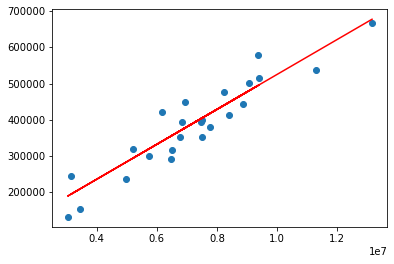

In [61]:
plt.scatter(X, y)
plt.plot(X, lr.coef_[0]*X + lr.intercept_, color='red')
plt.show()

In [62]:
# 3. 상관계수, 설명력 확인

In [63]:
import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(X)).fit()

In [523]:
results.summary()
# R-squared(설명력):	0.874
# Prob (F-statistic)(p-value):	7.63e-12
# F-statistic:	160.1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  인구(계)   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     155.9
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           1.84e-11
Time:                        13:38:30   Log-Likelihood:                -290.65
No. Observations:                  24   AIC:                             585.3
Df Residuals:                      22   BIC:                             587.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.667e+04   3.03e+04      0.881      0.388   -3.61e+04    8.95e+04
x1             0.0498      0.004     12.487      0.000       0.042       0.058
==============================================================================
Omnibus:                        2.707   Durbin-Watson:                   0.777
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                2.202
Skew:                           0.626   Prob(JB):                        0.332
Kurtosis:                       2.203   Cond. No.                     2.45e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [153]:
score= {}

for i in range(len(df)):
    score[df['자치구'][i]] = df['인구(계)'][i]/df['이동인구(합)'][i]

score = sorted(score.items(), key=operator.itemgetter(1))
score

[('중구', 0.043375677145631904),
 ('종로구', 0.044795554046216046),
 ('성동구', 0.045100132078527394),
 ('광진구', 0.04715347091363231),
 ('용산구', 0.0475614767096294),
 ('강남구', 0.047599406158745805),
 ('강동구', 0.04839298023735827),
 ('마포구', 0.048754730171291796),
 ('서대문구', 0.04879020067680745),
 ('서초구', 0.04929212554359312),
 ('성북구', 0.04991526560051742),
 ('송파구', 0.05075513091426258),
 ('동대문구', 0.05214593742311221),
 ('강북구', 0.05255683028740426),
 ('동작구', 0.05286876789148142),
 ('영등포구', 0.05325813023099911),
 ('노원구', 0.054718754075992485),
 ('관악구', 0.055227635033646125),
 ('중랑구', 0.05747033987662599),
 ('은평구', 0.05785296821016265),
 ('도봉구', 0.06103358021534849),
 ('강서구', 0.061783147232981714),
 ('양천구', 0.06466541246750988),
 ('구로구', 0.0680996775920077),
 ('금천구', 0.07768873474739872)]

### TOP 5  
1. 중구
2. 종로구
3. 성동구
4. 광진구
5. 용산구

## **6. 주간상주지(근무지)로 가는 유동인구와 총 종사자수는 상관관계가 있다.**(3)

In [65]:
# 1. 상관관계 분석 (상관계수, p-value)
# 2. 변수 2개로 회귀모델 세우기
# 2. 상관계수, 설명력 확인

In [66]:
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')

In [67]:
df_seoul_business.head()

,자치구,동,택시운송업(사업체수),택시운송업(종사자수),한식일반음식점업(사업체수),한식일반음식점업(종사자수),용달화물자동차운송업(사업체수),용달화물자동차운송업(종사자수),부동산중개및대리업(사업체수),부동산중개및대리업(종사자수),...,커피전문점(사업체수),커피전문점(종사자수),남녀용겉옷및셔츠도매업(사업체수),남녀용겉옷및셔츠도매업(종사자수),기타주점업(사업체수),기타주점업(종사자수),일반교과학원(사업체수),일반교과학원(종사자수),한식육류요리전문점(사업체수),한식육류요리전문점(종사자수)
0,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636",...,"16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
1,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
2,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220
3,종로구,삼청동,5,5,42,145,4,4,9,10,...,66,243,2,3,3,8,-,-,7,33
4,종로구,부암동,22,22,26,100,9,9,17,26,...,24,62,3,6,7,23,16,59,3,15


In [154]:
df_sum= pd.DataFrame()
df_sum= df_seoul_business[(df_seoul_business['동']=='소계')]

In [155]:
df_sum['택시운송업(종사자수)']= df_sum['택시운송업(종사자수)'].str.replace(',', '')
df_sum['택시운송업(종사자수)']= df_sum['택시운송업(종사자수)'].str.replace('-', '0')
df_sum['택시운송업(종사자수)']= df_sum['택시운송업(종사자수)'].astype('int64')

C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\2624246820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['택시운송업(종사자수)']= df_sum['택시운송업(종사자수)'].str.replace(',', '')
C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\2624246820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['택시운송업(종사자수)']= df_sum['택시운송업(종사자수)'].str.replace('-', '0')
C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\2624246820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [156]:
df_sum['한식일반음식점업(종사자수)']= df_sum['한식일반음식점업(종사자수)'].str.replace(',', '')
df_sum['한식일반음식점업(종사자수)']= df_sum['한식일반음식점업(종사자수)'].str.replace('-', '0')
df_sum['한식일반음식점업(종사자수)']= df_sum['한식일반음식점업(종사자수)'].astype('int64')

C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\2615035586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['한식일반음식점업(종사자수)']= df_sum['한식일반음식점업(종사자수)'].str.replace(',', '')
C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\2615035586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['한식일반음식점업(종사자수)']= df_sum['한식일반음식점업(종사자수)'].str.replace('-', '0')
C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\2615035586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [157]:
df_sum['용달화물자동차운송업(종사자수)']= df_sum['용달화물자동차운송업(종사자수)'].str.replace(',', '')
df_sum['용달화물자동차운송업(종사자수)']= df_sum['용달화물자동차운송업(종사자수)'].str.replace('-', '0')
df_sum['용달화물자동차운송업(종사자수)']= df_sum['용달화물자동차운송업(종사자수)'].astype('int64')

C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\1669621319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['용달화물자동차운송업(종사자수)']= df_sum['용달화물자동차운송업(종사자수)'].str.replace(',', '')
C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\1669621319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['용달화물자동차운송업(종사자수)']= df_sum['용달화물자동차운송업(종사자수)'].str.replace('-', '0')
C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\1669621319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [158]:
df_sum['두발미용업(종사자수)']= df_sum['두발미용업(종사자수)'].str.replace(',', '')
df_sum['두발미용업(종사자수)']= df_sum['두발미용업(종사자수)'].str.replace('-', '0')
df_sum['두발미용업(종사자수)']= df_sum['두발미용업(종사자수)'].astype('int64')

C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\3374467269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['두발미용업(종사자수)']= df_sum['두발미용업(종사자수)'].str.replace(',', '')
C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\3374467269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['두발미용업(종사자수)']= df_sum['두발미용업(종사자수)'].str.replace('-', '0')
C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\3374467269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [159]:
df_sum['커피전문점(종사자수)']= df_sum['커피전문점(종사자수)'].str.replace(',', '')
df_sum['커피전문점(종사자수)']= df_sum['커피전문점(종사자수)'].str.replace('-', '0')
df_sum['커피전문점(종사자수)']= df_sum['커피전문점(종사자수)'].astype('int64')

C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\294799042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['커피전문점(종사자수)']= df_sum['커피전문점(종사자수)'].str.replace(',', '')
C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\294799042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['커피전문점(종사자수)']= df_sum['커피전문점(종사자수)'].str.replace('-', '0')
C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\294799042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [160]:
df_sum['남녀용겉옷및셔츠도매업(종사자수)']= df_sum['남녀용겉옷및셔츠도매업(종사자수)'].str.replace(',', '')
df_sum['남녀용겉옷및셔츠도매업(종사자수)']= df_sum['남녀용겉옷및셔츠도매업(종사자수)'].str.replace('-', '0')
df_sum['남녀용겉옷및셔츠도매업(종사자수)']= df_sum['남녀용겉옷및셔츠도매업(종사자수)'].astype('int64')

C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\2966046913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['남녀용겉옷및셔츠도매업(종사자수)']= df_sum['남녀용겉옷및셔츠도매업(종사자수)'].str.replace(',', '')
C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\2966046913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['남녀용겉옷및셔츠도매업(종사자수)']= df_sum['남녀용겉옷및셔츠도매업(종사자수)'].str.replace('-', '0')
C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\2966046913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [161]:
df_sum['기타주점업(종사자수)']= df_sum['기타주점업(종사자수)'].str.replace(',', '')
df_sum['기타주점업(종사자수)']= df_sum['기타주점업(종사자수)'].str.replace('-', '0')
df_sum['기타주점업(종사자수)']= df_sum['기타주점업(종사자수)'].astype('int64')

C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\3540541059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['기타주점업(종사자수)']= df_sum['기타주점업(종사자수)'].str.replace(',', '')
C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\3540541059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['기타주점업(종사자수)']= df_sum['기타주점업(종사자수)'].str.replace('-', '0')
C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\3540541059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [162]:
df_sum['일반교과학원(종사자수)']= df_sum['일반교과학원(종사자수)'].str.replace(',', '')
df_sum['일반교과학원(종사자수)']= df_sum['일반교과학원(종사자수)'].str.replace('-', '0')
df_sum['일반교과학원(종사자수)']= df_sum['일반교과학원(종사자수)'].astype('int64')

C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\1416222741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['일반교과학원(종사자수)']= df_sum['일반교과학원(종사자수)'].str.replace(',', '')
C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\1416222741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['일반교과학원(종사자수)']= df_sum['일반교과학원(종사자수)'].str.replace('-', '0')
C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\1416222741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [163]:
df_sum['한식육류요리전문점(종사자수)']= df_sum['한식육류요리전문점(종사자수)'].str.replace(',', '')
df_sum['한식육류요리전문점(종사자수)']= df_sum['한식육류요리전문점(종사자수)'].str.replace('-', '0')
df_sum['한식육류요리전문점(종사자수)']= df_sum['한식육류요리전문점(종사자수)'].astype('int64')

C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\1411520575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['한식육류요리전문점(종사자수)']= df_sum['한식육류요리전문점(종사자수)'].str.replace(',', '')
C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\1411520575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['한식육류요리전문점(종사자수)']= df_sum['한식육류요리전문점(종사자수)'].str.replace('-', '0')
C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\1411520575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [164]:
df_sum['부동산중개및대리업(종사자수)']= df_sum['부동산중개및대리업(종사자수)'].str.replace(',', '')
df_sum['부동산중개및대리업(종사자수)']= df_sum['부동산중개및대리업(종사자수)'].str.replace('-', '0')
df_sum['부동산중개및대리업(종사자수)']= df_sum['부동산중개및대리업(종사자수)'].astype('int64')

C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\3326993249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['부동산중개및대리업(종사자수)']= df_sum['부동산중개및대리업(종사자수)'].str.replace(',', '')
C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\3326993249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['부동산중개및대리업(종사자수)']= df_sum['부동산중개및대리업(종사자수)'].str.replace('-', '0')
C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\3326993249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [79]:
df_sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 431
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   자치구                25 non-null     object
 1   동                  25 non-null     object
 2   택시운송업(사업체수)        25 non-null     object
 3   택시운송업(종사자수)        25 non-null     int64 
 4   한식일반음식점업(사업체수)     25 non-null     object
 5   한식일반음식점업(종사자수)     25 non-null     int64 
 6   용달화물자동차운송업(사업체수)   25 non-null     object
 7   용달화물자동차운송업(종사자수)   25 non-null     int64 
 8   부동산중개및대리업(사업체수)    25 non-null     object
 9   부동산중개및대리업(종사자수)    25 non-null     int64 
 10  두발미용업(사업체수)        25 non-null     object
 11  두발미용업(종사자수)        25 non-null     int64 
 12  커피전문점(사업체수)        25 non-null     object
 13  커피전문점(종사자수)        25 non-null     int64 
 14  남녀용겉옷및셔츠도매업(사업체수)  25 non-null     object
 15  남녀용겉옷및셔츠도매업(종사자수)  25 non-null     int64 
 16  기타주점업(사업체수)        25 non-null     object
 17

In [173]:
df_sum['총 종사자수']= df_sum['택시운송업(종사자수)'] + \
df_sum['한식일반음식점업(종사자수)'] + \
df_sum['용달화물자동차운송업(종사자수)'] + \
df_sum['부동산중개및대리업(종사자수)'] + \
df_sum['두발미용업(종사자수)'] + \
df_sum['커피전문점(종사자수)'] + \
df_sum['남녀용겉옷및셔츠도매업(종사자수)'] + \
df_sum['기타주점업(종사자수)'] + \
df_sum['일반교과학원(종사자수)'] + \
df_sum['한식육류요리전문점(종사자수)']

C:\Users\박유진\AppData\Local\Temp\ipykernel_23872\2203305370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['총 종사자수']= df_sum['택시운송업(종사자수)'] + \


In [174]:
df_sum.head()

,자치구,동,택시운송업(사업체수),택시운송업(종사자수),한식일반음식점업(사업체수),한식일반음식점업(종사자수),용달화물자동차운송업(사업체수),용달화물자동차운송업(종사자수),부동산중개및대리업(사업체수),부동산중개및대리업(종사자수),...,커피전문점(종사자수),남녀용겉옷및셔츠도매업(사업체수),남녀용겉옷및셔츠도매업(종사자수),기타주점업(사업체수),기타주점업(종사자수),일반교과학원(사업체수),일반교과학원(종사자수),한식육류요리전문점(사업체수),한식육류요리전문점(종사자수),총 종사자수
1,종로구,소계,215,215,"1,548",5912,618,646,549,889,...,3613,400,962,537,1413,110,382,437,1982,16494
19,중구,소계,230,235,"1,588",6414,300,333,576,1152,...,3542,"10,810",24248,381,982,57,175,443,2121,40018
35,용산구,소계,416,523,857,2987,455,466,791,1214,...,2076,54,317,487,1332,104,573,300,1184,11449
52,성동구,소계,"1,200",2527,956,2785,"1,072",1161,801,1453,...,1859,149,1572,285,621,258,1494,400,1545,15868
70,광진구,소계,"1,119",1744,963,2861,968,985,871,1313,...,1887,89,687,633,1577,413,1646,467,1678,15715


In [175]:
df_sum_W= pd.DataFrame()

In [176]:
df_sum_W= df_seoul_moving[(df_seoul_moving['이동유형']=='HW') | (df_seoul_moving['이동유형']=='EW') | \
                    (df_seoul_moving['이동유형']=='WW')]

In [177]:
df_sum_W.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
3,202204,일,0,11010,11010,F,10,HW,10,6.05
9,202204,일,0,11010,11010,F,15,HW,10,8.04
11,202204,일,0,11010,11010,F,15,WW,10,10.12
14,202204,일,0,11010,11010,F,15,EW,10,4.06
17,202204,일,0,11010,11010,F,20,WW,20,44.39


In [178]:
df_seoul_moving_sum_W= df_sum_W.groupby('도착 시군구 코드')[['이동인구(합)']].sum()

In [179]:
df_seoul_moving_sum_W= pd.merge(standard, df_seoul_moving_sum_W, how='inner', on='도착 시군구 코드')

In [180]:
df_business_employee= pd.DataFrame()

In [181]:
df_business_employee_sum= df_sum[['자치구', '총 종사자수']]

In [182]:
df= pd.merge(df_business_employee_sum, df_seoul_moving_sum_W, how='inner', on='자치구')

In [90]:
from scipy.stats import mannwhitneyu
mannwhitneyu(df['이동인구(합)'], df['총 종사자수'])

MannwhitneyuResult(statistic=625.0, pvalue=1.4156562248495537e-09)

In [91]:
# 2. 변수 2개로 회귀모델 세우기

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [93]:
lr = LinearRegression()

In [94]:
y= df['총 종사자수']
X= df[['이동인구(합)']]

X= X.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [95]:
lr.fit(X_train, y_train)

LinearRegression()

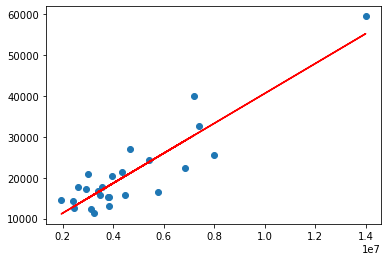

In [96]:
plt.scatter(X, y)
plt.plot(X, lr.coef_[0]*X + lr.intercept_, color='red')
plt.show()

In [97]:
# 3. 상관계수, 설명력 확인

In [98]:
import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(X)).fit()

In [558]:
results.summary()
# R-squared(설명력):	0.809
# Prob (F-statistic)(p-value):	9.60e-10
# F-statistic:	97.61

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 총 종사자수   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     97.61
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           9.60e-10
Time:                        13:39:02   Log-Likelihood:                -245.62
No. Observations:                  25   AIC:                             495.2
Df Residuals:                      23   BIC:                             497.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3822.4957   1956.408      1.954      0.063    -224.643    7869.635
x1             0.0037      0.000      9.880      0.000       0.003       0.004
==============================================================================
Omnibus:                        0.053   Durbin-Watson:                   2.263
Prob(Omnibus):                  0.974   Jarque-Bera (JB):                0.267
Skew:                          -0.038   Prob(JB):                        0.875
Kurtosis:                       2.499   Cond. No.                     1.10e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [183]:
score= {}

for i in range(len(df)):
    score[df['자치구'][i]] = df['총 종사자수'][i]/df['이동인구(합)'][i]

score = sorted(score.items(), key=operator.itemgetter(1))
score

[('종로구', 0.0028472157857252307),
 ('서초구', 0.003183917539072276),
 ('영등포구', 0.003258708576675908),
 ('서대문구', 0.003436777631031836),
 ('용산구', 0.0035258591744129143),
 ('성동구', 0.0035402550774309093),
 ('성북구', 0.003943581584128278),
 ('동작구', 0.003964420488892748),
 ('동대문구', 0.003996774775616521),
 ('강남구', 0.004241665780998825),
 ('송파구', 0.004423070124549991),
 ('마포구', 0.004478975704052689),
 ('광진구', 0.004516740367663873),
 ('강동구', 0.004894674479579775),
 ('구로구', 0.0049505317911965885),
 ('관악구', 0.00498731092401307),
 ('강북구', 0.0050879403121154455),
 ('노원구', 0.005181561611826663),
 ('중구', 0.005551127709624446),
 ('강서구', 0.005780520136424039),
 ('은평구', 0.005868681917553006),
 ('금천구', 0.00598789557409639),
 ('중랑구', 0.006756202611966252),
 ('양천구', 0.007032057904145992),
 ('도봉구', 0.007447678015873102)]

### TOP 5  
1. 종로구
2. 서초구
3. 영등포구
4. 서대문구
5. 용산구

## **총 종사자수와 버스 정류장 수는 상관관계가 있다.**(4)

In [100]:
df_business_employee_sum= df_business_employee_sum.sort_values('자치구')

In [101]:
df_seoul_people= df_seoul_people.tail(25)
df_seoul_bus_station_re= df_seoul_bus_station.sort_values('자치구')

In [102]:
df_seoul_bus_station_re.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [111]:
df_business_employee_sum = df_business_employee_sum.reset_index(drop=True)

In [104]:
from scipy.stats import shapiro
stats.shapiro(df_seoul_bus_station_re['정류장수'])

ShapiroResult(statistic=0.9804373383522034, pvalue=0.8936382532119751)

In [105]:
stats.shapiro(df_business_employee_sum['총 종사자수']) # 정규성을 안 따름

ShapiroResult(statistic=0.7318196296691895, pvalue=2.0146468159509823e-05)

In [106]:
from scipy.stats import mannwhitneyu
mannwhitneyu(df_seoul_bus_station_re['정류장수'], df_business_employee_sum['총 종사자수'])

MannwhitneyuResult(statistic=0.0, pvalue=1.4156562248495537e-09)

In [112]:
score= {}

for i in range(len(df)):
    score[df_business_employee_sum['자치구'][i]] = df_seoul_bus_station_re['정류장수'][i]/df_business_employee_sum['총 종사자수'][i]

score = sorted(score.items(), key=operator.itemgetter(1))
score

[('중구', 0.004447998400719676),
 ('강남구', 0.008400390559240429),
 ('송파구', 0.012702396620856418),
 ('양천구', 0.015176022835394862),
 ('광진구', 0.017117403754374802),
 ('강동구', 0.017276898586009927),
 ('동대문구', 0.02008269344359126),
 ('영등포구', 0.020790485558436912),
 ('강서구', 0.020938921978469166),
 ('종로구', 0.021159209409482235),
 ('중랑구', 0.021468926553672316),
 ('마포구', 0.023086718974653905),
 ('서초구', 0.023546956555865153),
 ('금천구', 0.024102277490568674),
 ('도봉구', 0.024811666321100285),
 ('노원구', 0.025172633331700868),
 ('관악구', 0.02614305750350631),
 ('성동구', 0.027413662717418703),
 ('용산구', 0.028212070923224735),
 ('구로구', 0.02891308227735142),
 ('은평구', 0.02921623512946116),
 ('강북구', 0.0329714194475491),
 ('서대문구', 0.03456116416552979),
 ('동작구', 0.035635831095923845),
 ('성북구', 0.039665282994004084)]

### TOP 5  
1. 중구
2. 강남구
3. 송파구
4. 양천구
5. 광진구

### **7. 이동유형 HW의 이동인구와 HE의 이동인구에는 차이가 있다.**

In [285]:
# 1. 상관관계 분석 (상관계수, p-value)
# 2. 변수 2개로 회귀모델 세우기
# 2. 상관계수, 설명력 확인

In [286]:
HW= df_seoul_moving[df_seoul_moving['이동유형']=='HW']
HE= df_seoul_moving[df_seoul_moving['이동유형']=='HE']

In [288]:
# t-test
result = ttest_ind(HW['이동인구(합)'], HE['이동인구(합)'], equal_var=False) 
print('t statistic : %f \np-value : %f' % (result))

t statistic : 43.115217 
p-value : 0.000000


In [291]:
# 2. 변수 2개로 회귀모델 세우기

In [293]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
lr = LinearRegression()

In [292]:
print(HW.shape, HE.shape)

(1175530, 10) (1664541, 10)


In [294]:
HE= HE.head(1100000)
HW= HW.head(1100000)

In [295]:
print(HW.shape, HE.shape)

(1100000, 10) (1100000, 10)


In [ ]:
import statsmodels.api as sm

In [296]:
y= HW['이동인구(합)']
X= HE[['이동인구(합)']]

X= X.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [297]:
# lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# # plt.scatter(X, y)
# rx= np.random.choice(HE['이동인구(합)'], 1)
# ry= np.random.choice(HW['이동인구(합)'], 1)
# plt.scatter(rx, ry)
# plt.plot(X, lr.coef_[0]*X + lr.intercept_, color='red')
# plt.show()

In [ ]:
# 3. 상관계수, 설명력 확인

In [300]:
import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(X)).fit()

In [301]:
results.summary()
# R-squared(설명력):	0.000
# Prob (F-statistic)(p-value):	0.00303
# F-statistic:	8.787

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                이동인구(합)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.787
Date:                Sat, 05 Nov 2022   Prob (F-statistic):            0.00303
Time:                        08:08:27   Log-Likelihood:            -7.5348e+06
No. Observations:             1100000   AIC:                         1.507e+07
Df Residuals:                 1099998   BIC:                         1.507e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.6175      0.230    298.708      0.000      68.167      69.068
x1            -0.0038      0.001     -2.964      0.003      -0.006      -0.001
==============================================================================
Omnibus:                  2280873.597   Durbin-Watson:                   0.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      13777295322.571
Skew:                          17.590   Prob(JB):                         0.00
Kurtosis:                     550.136   Cond. No.                         190.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **8. 구의 인구와 버스정류장개수는 상관관계가 있다.**(5)

In [113]:
# 1. 상관관계 분석 (상관계수, p-value)
# 2. 변수 2개로 회귀모델 세우기
# 2. 상관계수, 설명력 확인

In [114]:
df_seoul_people= df_seoul_people.tail(25)
# columns= 인구(계), 버스정류장개수

In [115]:
df_seoul_people_re= df_seoul_people.sort_values('자치구')

In [116]:
df_seoul_bus_station_re= df_seoul_bus_station.sort_values('자치구')

In [117]:
# 상관분석
import scipy.stats as stats

In [118]:
X= df_seoul_people_re['인구(계)']
y= df_seoul_bus_station_re['정류장수']

corr, p_value= stats.pearsonr(X,y)
print(corr, p_value)

0.5666148323603176 0.0031462922429467965


In [119]:
# 2. 변수 2개로 회귀모델 세우기

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [121]:
lr = LinearRegression()

In [122]:
y= df_seoul_bus_station_re['정류장수']
X= df_seoul_people_re['인구(계)']

X= X.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [123]:
lr.fit(X_train, y_train)

LinearRegression()

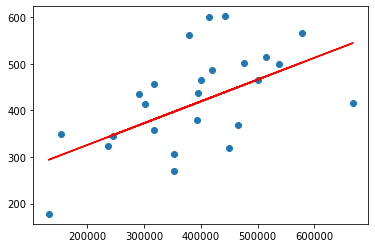

In [124]:
plt.scatter(X, y)
plt.plot(X, lr.coef_[0]*X + lr.intercept_, color='red')
plt.show()

In [125]:
# 3. 상관계수, 설명력 확인

In [126]:
import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(X)).fit()

In [315]:
results.summary()
# R-squared(설명력):	0.321
# Prob (F-statistic)(p-value):	0.00315
# F-statistic:	10.88

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   정류장수   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     10.88
Date:                Sat, 05 Nov 2022   Prob (F-statistic):            0.00315
Time:                        08:15:39   Log-Likelihood:                -146.77
No. Observations:                  25   AIC:                             297.5
Df Residuals:                      23   BIC:                             300.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        238.6650     59.151      4.035      0.001     116.302     361.028
x1             0.0005      0.000      3.298      0.003       0.000       0.001
==============================================================================
Omnibus:                        0.182   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.913   Jarque-Bera (JB):                0.393
Skew:                          -0.009   Prob(JB):                        0.822
Kurtosis:                       2.386   Cond. No.                     1.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
df_seoul_people_re = df_seoul_people_re.reset_index(drop=True)
df_seoul_bus_station_re = df_seoul_bus_station_re.reset_index(drop=True)

In [131]:
score= {}

for i in range(len(df_seoul_people_re)):
    score[df_seoul_people_re['자치구'][i]] = df_seoul_bus_station_re['정류장수'][i]/df_seoul_people_re['인구(계)'][i]

score = sorted(score.items(), key=operator.itemgetter(1))
score

[('송파구', 0.0006210148430029584),
 ('양천구', 0.0007098700870981668),
 ('광진구', 0.0007618022712469202),
 ('강동구', 0.0007933828857206131),
 ('동대문구', 0.0008678586014430276),
 ('강남구', 0.0009286519844120461),
 ('관악구', 0.000931374116593649),
 ('중랑구', 0.0009654471544715447),
 ('강서구', 0.0009785175631800785),
 ('노원구', 0.0009991349901349999),
 ('은평구', 0.001052492263866743),
 ('동작구', 0.0011098469779474926),
 ('도봉구', 0.0011285759195221628),
 ('구로구', 0.0011571869404548745),
 ('영등포구', 0.0011618000154906669),
 ('중구', 0.0013541270445036136),
 ('성북구', 0.001359898798228969),
 ('용산구', 0.0013656465892659332),
 ('강북구', 0.0013728957795920537),
 ('금천구', 0.0014087325082380226),
 ('서대문구', 0.0014381455491602932),
 ('서초구', 0.0014504069600195322),
 ('마포구', 0.001484302575872424),
 ('성동구', 0.0014917235064761376),
 ('종로구', 0.0022708935217719477)]

### TOP 5  
1. 송파구
2. 양천구
3. 광진구
4. 강동구
5. 동대문구

## 승하차총승객수와 정류장수는 상관관계가 있다. (6)

In [132]:
df_seoul_bus_station['승하차총승객수'] = df_seoul_bus_station['승차총승객수'] + df_seoul_bus_station['하차총승객수']
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,승하차총승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512,15599696
1,강동구,369,21,2890053,2830506,99.161194,97.118065,5720559
2,강북구,413,67,4825181,4671783,133.020373,128.791504,9496964
3,강서구,566,49,4681083,4652828,88.119480,87.587591,9333911
4,관악구,466,86,7655819,7792476,154.753674,157.516040,15448295


In [133]:
df = df_seoul_bus_station[['자치구','정류장수','노선수','승하차총승객수']]
df.head()

,자치구,정류장수,노선수,승하차총승객수
0,강남구,499,91,15599696
1,강동구,369,21,5720559
2,강북구,413,67,9496964
3,강서구,566,49,9333911
4,관악구,466,86,15448295


In [134]:
score= {}

for i in range(len(df)):
    score[df['자치구'][i]] = df['정류장수'][i]/df['승하차총승객수'][i]

score = sorted(score.items(), key=operator.itemgetter(1))
score

[('중구', 2.4133606901777712e-05),
 ('동대문구', 2.9548247846840425e-05),
 ('관악구', 3.016514120166659e-05),
 ('강남구', 3.1987802839234814e-05),
 ('종로구', 3.26952635617658e-05),
 ('송파구', 3.6904536412327714e-05),
 ('용산구', 3.9026389451227346e-05),
 ('서대문구', 3.910652230756954e-05),
 ('영등포구', 4.035377328607979e-05),
 ('양천구', 4.0583460395186216e-05),
 ('동작구', 4.200814267423069e-05),
 ('서초구', 4.225566366745356e-05),
 ('강북구', 4.348758192618188e-05),
 ('금천구', 4.6883994592440834e-05),
 ('성북구', 4.8284915006518464e-05),
 ('은평구', 4.8526955076922005e-05),
 ('광진구', 4.888368028328547e-05),
 ('구로구', 5.024196260405953e-05),
 ('중랑구', 5.044160295980707e-05),
 ('도봉구', 5.509746726611892e-05),
 ('마포구', 5.5942346335482666e-05),
 ('노원구', 5.9449325753274425e-05),
 ('강서구', 6.063910401545504e-05),
 ('강동구', 6.45041856923423e-05),
 ('성동구', 7.832167630713476e-05)]

### TOP 5  
1. 중구
2. 동대문구
3. 관악구
4. 강남구
5. 종로구

### **<최종 취합>**

In [ ]:
# 가장 설명력(R^2), 상관계수(R)가 높은 가설 5개 선정
# 해당 가설 5개에 대한 top 5 자치구 선정
# 각 가설의 top 5를 취합하여, 가장 정류장이 필요한 자치구 top 5 선정

- 노선수와 유입인구수는 상관관계가 있다. 

- 주간상주지(근무지)로 가는 유동인구와 총 종사자수는 상관관계가 있다.

- 총 종사자수와 버스정류장 수는 상관관계가 있다.

- 야간상주지(집)으로 가는 유동인구와 등록인구는 상관관계가 있다. 

- 승하차총승객수와 정류장수와 상관관계가 있다.

- 구의 인구와 버스정류장개수는 상관관계가 있다. 

1. 가설 5개에 대해 순위를 매기고, 순위 평균을 내서 Top 1 선정

2. Top 1 자치구에 대해... 이 자치구가 왜 가장 버스정류장 설치가 시급한 구인지에 대한 자료조사 시작

3. 최종적으로 백지피피티로 자료정리를 할 때는, 통계검정이랑 자료조사를 잘 섞어서.. 최종적으로 이러이러한 근거로 이 자치구가 Top1로 선정된거다~ 라는 흐름으로 작성

In [ ]:
# 순위를 어떤 방식으로 매길까 -> 비율

# 노선수와 유입인구수는 상관관계가 있다.
# (노선수/유입인구수) 가 작을수록 불쌍...

# 승하차총승객수와 정류장수/와 상관관계가 있다.
# (정류장수/승하차총승객수)가 작을수록 불쌍...

# 주간상주지(근무지)로 가는 유동인구와 총 종사자수는 상관관계가 있다.
# 총 종사자수와 버스 정류장 수는 상관관계가 있다.

# 우선, (버스정류장개수/구의인구)가 작을수록 불쌍...
# 주간상주지(근무지)로 가는 유동인구 == 근무지가 해당 자치구에 있는 사람 중, 버스를 타고 근무지로 이동하는 사람
# 총 종사자수 - 근무지가 해당 자치구에 있는 사람 중, 버스를 타고 근무지로 이동하는 사람(주간상주지(근무지)로 가는 유동인구) 
# =  자치구 내에서 근무지가 있으며, 출근 시 버스를 안 타는 사람.
# (주간상주지(근무지)로 가는 유동인구/총 종사자수) 가 크면, 총 종사자 수가 대비 버스 타는 사람이 많다.
# -> 근데, 총 종사자 수랑 버스정류장 수는 비례
# -> 그러니까.. 총 종사자 수가 적어서 버스 정류장 수는 적은데, 총 종사자 수 대비 버스를 이용하는 종사자는 많은 자치구이기 때문에, 
# 총 종사자수가 적음에도 추가적인 버스정류장 설치가 필요한 자치구라고 볼 수 있다. 


# 야간상주지(집)으로 가는 유동인구와 구의 인구는 상관관계가 있다.
# 구의 인구와 버스정류장개수는 상관관계가 있다. 

# 우선, (버스정류장개수/구의인구)가 작을수록 불쌍...
# 야간상주지(집)으로 가는 유동인구 == 집이 해당 자치구에 있는 사람 중, 버스를 타고 집으로 이동하는 사람
# 구의 인구 - 집이 해당 자치구에 있는 사람 중, 버스를 타고 집으로 이동하는 사람 =  자치구 내에서 거주하는 버스를 안 타는 사람.
# 야간상주지(집)으로 가는 유동인구 / 구의 인구 가 크면, 구의 인구 대비 버스 타는 사람 많다.
# -> 근데, 구의 인구랑 버스정류장 수는 비례
# -> 그러니까.. 구의 인구가 적어서 버스 정류장 수는 적은데, 구의 인구 대비 버스를 이용하는 사람은 많은 자치구이기 때문에, 
# 구의 인구가 적음에도 추가적인 버스정류장 설치가 필요한 자치구라고 볼 수 있다. 
